In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
# ipl_ball_by_ball_data

In [3]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [4]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [6]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [7]:
df.innings.unique()

array([2, 1], dtype=int64)

In [8]:
# what are the number when ABD faces bumrah?
# step 1 : Filter by player names
# step 2 : Use these names & assign it to striker & bowler 
# step 3 : Get the required columns 

In [9]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [10]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [11]:
# player 1 : 'JJ Bumrah'
# player 2  'AB de Villiers'

In [12]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [13]:
req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'JJ Bumrah')]

In [14]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#  No of runs scored?
#  No of balls faceed ?
#  No of times dimissed ?

In [16]:
# Runs
sum(req_df.runs_off_bat)

125L

In [17]:
# balls faced
len(req_df)

86

In [18]:
# outs
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

3

In [19]:
# strike rate 
100*sum(req_df.runs_off_bat)/len(req_df)

145L

In [20]:
# comparision aganist all batsman Bumrah has bowled to

In [21]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
bumrah_df = df[df.bowler == 'JJ Bumrah' ]

In [23]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# runs scored by this batsman
bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [25]:
bdf2 = pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()

In [26]:
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,86
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [27]:
bdf3 = bdf1.merge(bdf2, on = 'striker', how = 'left')

In [28]:
bdf3.head(1)

,striker,runs_off_bat,ball
0,A Mishra,1,5


In [29]:
bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']

In [30]:
bdf3.head(1)

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.0


In [31]:
# min criteria: 30 balls

In [32]:
bdf3 = bdf3[bdf3.ball >= 30]

In [33]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,125,86,145.348837
3,AD Russell,51,41,124.390244
8,AM Rahane,43,35,122.857143
9,AR Patel,21,32,65.625000
12,AT Rayudu,48,34,141.176471


In [34]:
abd_df = df[df.striker == 'AB de Villiers' ]

In [35]:
# runs scored by this batsman
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [36]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [37]:
# ball faced
adf2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [38]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [39]:
adf3 = adf1.merge(adf2, on = 'bowler', how = 'left')

In [40]:
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [41]:
adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']

In [42]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [43]:
# mim criteria : 30

In [44]:
adf3 = adf3[adf3.ball >= 30]

In [45]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,39,223.076923
20,AR Patel,71,70,101.428571
32,B Kumar,68,43,158.139535


In [46]:
# bdf3 , adf3

In [47]:
bdf3.reset_index(inplace = True, drop = True)
adf3.reset_index(inplace = True, drop = True)

In [48]:
bdf3.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
11,JP Duminy,70,33,212.121212
15,MK Pandey,61,33,184.848485
7,F du Plessis,58,34,170.588235
12,KD Karthik,54,33,163.636364
26,V Kohli,126,85,148.235294
24,SS Iyer,59,40,147.500000
0,AB de Villiers,125,86,145.348837
19,RV Uthappa,52,36,144.444444
4,AT Rayudu,48,34,141.176471
21,SK Raina,50,39,128.205128


In [49]:
adf3.sort_values('strike_rate', ascending = False)

,bowler,runs_off_bat,ball,strike_rate
8,HH Pandya,88,39,225.641026
2,AD Russell,87,39,223.076923
15,JP Faulkner,62,30,206.666667
5,CH Morris,71,35,202.857143
19,Mohammed Shami,59,30,196.666667
30,SL Malinga,124,64,193.750000
33,Sandeep Sharma,107,57,187.719298
28,SB Jakati,55,30,183.333333
17,M Ashwin,55,31,177.419355
22,PV Tambe,54,32,168.750000


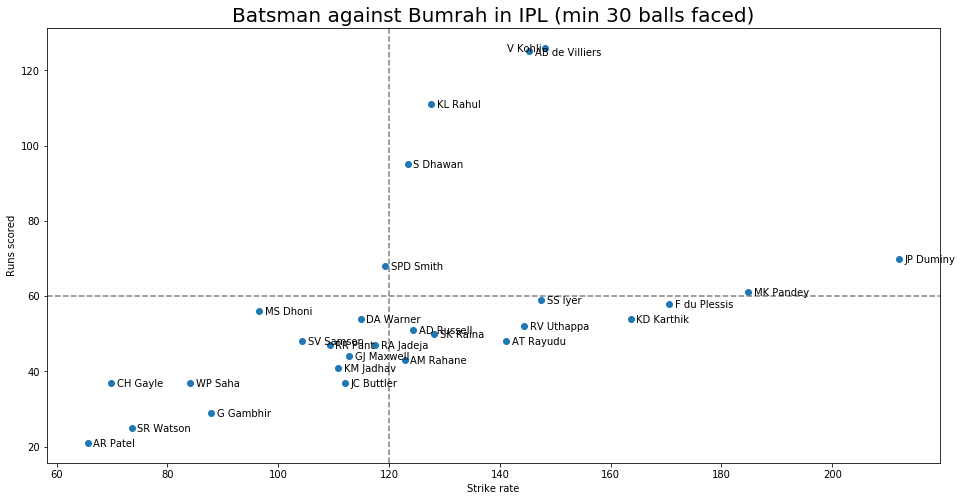

In [51]:
plt.figure(figsize = (16, 8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)

for i in range(len(bdf3)):
#     plt.text(x, y, text)
    if bdf3['striker'][i] == 'V Kohli':
        plt.text(bdf3['strike_rate'][i] - 7, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )
    else:
        plt.text(bdf3['strike_rate'][i] + 1, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

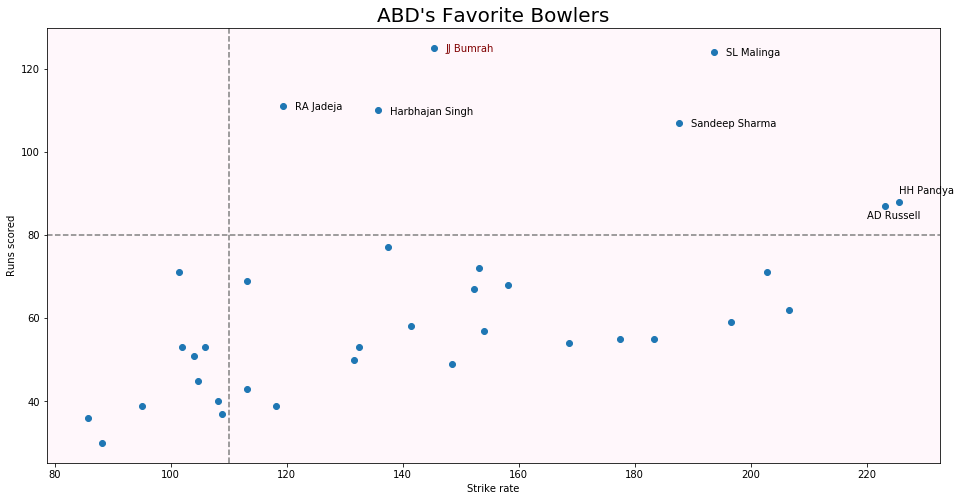

In [54]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)

for i in range(len(adf3)):
    if adf3.bowler[i] == 'JJ Bumrah':
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i] == 'HH Pandya'):
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 2, adf3.bowler[i])
    elif (adf3.bowler[i] == 'AD Russell'):
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()